In [113]:
import pandas as pd
import numpy as np
from sklearn.linear_model import ElasticNetCV
from datetime import date
from plotly import graph_objects as go

In [25]:
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
month_dict=dict(zip(months,range(1,13)))

In [49]:
def parse_support_date(elem):
    if elem.find('-')>0:
        day,month=elem.split('-')
        month=str(month_dict[month])
        return '2020-'+month+'-'+day
    else:
        return ''

In [56]:
disc_pd=pd.read_csv('data/discretion.csv',names=['date','value'],usecols=[0,1],parse_dates=[0])

In [57]:
disc_pd

,date,value
0,2019-12-03,943.85
1,2019-12-04,947.67
2,2019-12-05,945.56
3,2019-12-06,953.20
4,2019-12-09,953.89
...,...,...
249,2020-11-27,1280.15
250,2020-11-30,1271.42
251,2020-12-01,1283.97
252,2020-12-02,1275.02


In [58]:
disc_pd.dropna(inplace=True)

In [59]:
disc_pd.dtypes

date     datetime64[ns]
value           float64
dtype: object

In [50]:
support_pd=pd.read_csv('data/support.csv',names=['date','biden','trump'],usecols=[0,2,3],parse_dates=[0],date_parser=parse_support_date)

In [51]:
support_pd

,date,biden,trump
0,2020-11-02,53,43
1,2020-11-02,50,46
2,2020-11-02,52,45
3,2020-11-02,54,43
4,2020-11-01,52,42
...,...,...,...
173,2020-09-01,51,40
174,2020-09-01,49,41
175,2020-09-01,49,45
176,2020-09-01,47,40


In [75]:
min_date=support_pd.date.min()
max_date=support_pd.date.max()

In [121]:
our_df=disc_pd[(disc_pd.date>=min_date) & (disc_pd.date<=max_date)].copy()
our_df.value/=24

In [122]:
valid_dates=our_df.date.unique()

In [123]:
bd_data=[support_pd[support_pd.date==elem].biden.mean() for elem in valid_dates]

In [124]:
trump_data=[support_pd[support_pd.date==elem].trump.mean() for elem in valid_dates]

In [125]:
our_df['bd']=bd_data

In [126]:
our_df['trump']=trump_data

In [127]:
numOfFolds=5

In [128]:
input_trump=[[elem] for elem in trump_data]

In [129]:
input_biden=[[elem] for elem in bd_data]

In [130]:
regr=ElasticNetCV(cv=numOfFolds)

In [131]:
regr.fit(input_biden,our_df.value)

ElasticNetCV(cv=5)

In [132]:
predicted_bd=regr.predict(input_biden)

In [133]:
our_df['bd_predicted']=predicted_bd

In [134]:
fig=go.Figure()

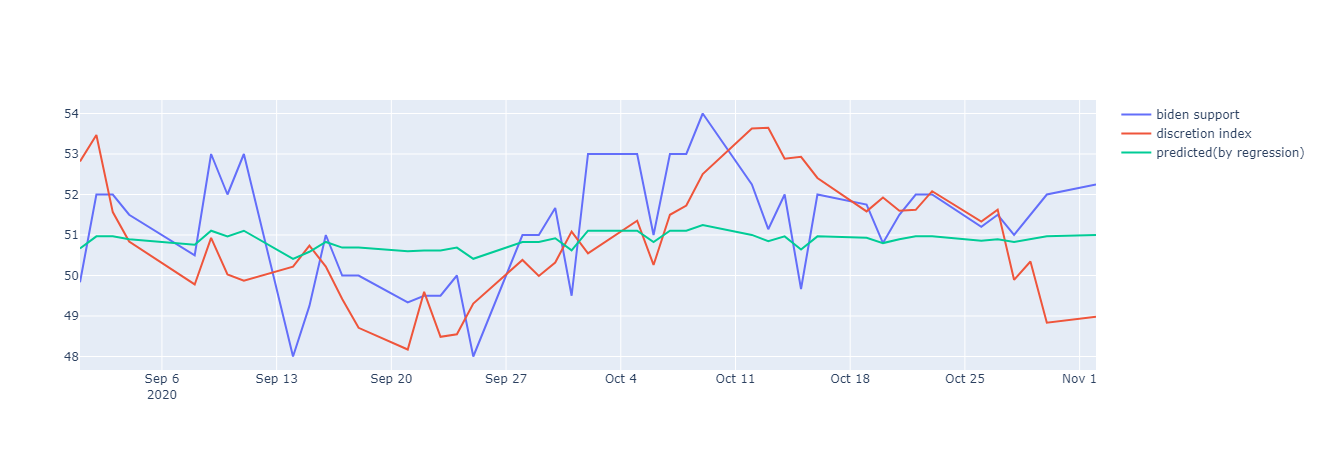

In [135]:
fig.add_traces([go.Scatter(x=our_df.date,y=our_df.bd,name='biden support'),
               go.Scatter(x=our_df.date,y=our_df.value,name='discretion index'),
               go.Scatter(x=our_df.date,y=predicted_bd,name='predicted(by regression)')])